Reference - https://www.kaggle.com/code/rounak15/titanic-survival-prediction-with-python/notebook

Importing the packages and libraries.

Reading and Exploring the Data.

Data Analysis.

Visual Data Analysis.

Cleaning the Data

Feature Engineering

Machine learning

Submitting our predictions

In [1]:
#lets load the required packages and libraries for data analysis
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading and exploring the data**

In [3]:
#importing the training and test datasets
train_df = pd.read_csv('https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/09_machine_learning/titanic_survival_prediction/Data/train.csv')

test_df = pd.read_csv('https://raw.githubusercontent.com/Rohanrathod7/my-ds-projects/main/09_machine_learning/titanic_survival_prediction/Data/test.csv')

In [4]:
#lets take a look at our training data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Now the test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# lets see what kind of data we have to work with
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


** Data analysis :**

In [7]:
#printing out a list of all the columns in our training dataset
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
#printing summary statistics
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [10]:
#Finding the percantage of missing values in train dataset
train_df.isnull().sum()/ len(train_df) *100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [11]:
#Finding the percentage of Null values in test dataset
test_df.isnull().sum()/ len(test_df) *100

,0
PassengerId,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234
Cabin,78.229665


,count
Sex,
male,577
female,314


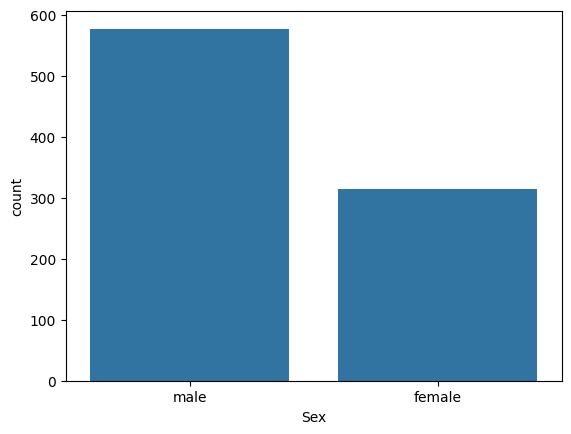

In [13]:
sns.countplot(x='Sex',data=train_df)
train_df['Sex'].value_counts()

,Sex,Survived
0,female,0.742038
1,male,0.188908


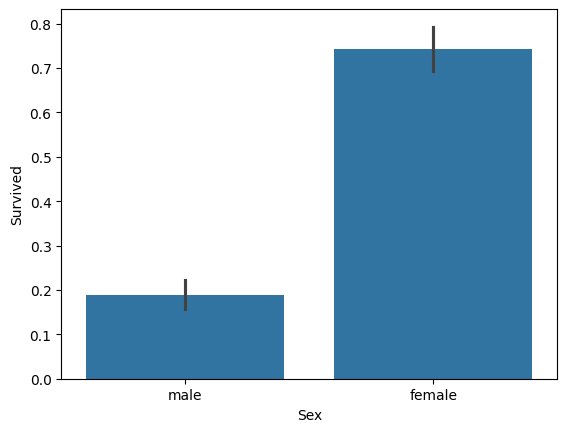

In [14]:
#Comparing the Sex feature against Survived
sns.barplot(x='Sex',y='Survived',data=train_df)
train_df.groupby('Sex',as_index=False).Survived.mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


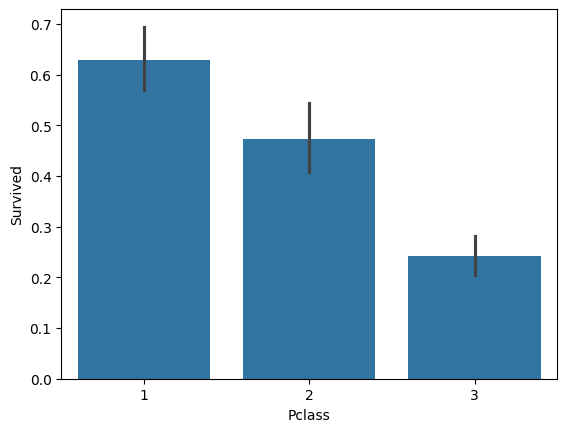

In [15]:
#Comparing the Pclass feature against Survived
sns.barplot(x='Pclass',y='Survived',data=train_df)
train_df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


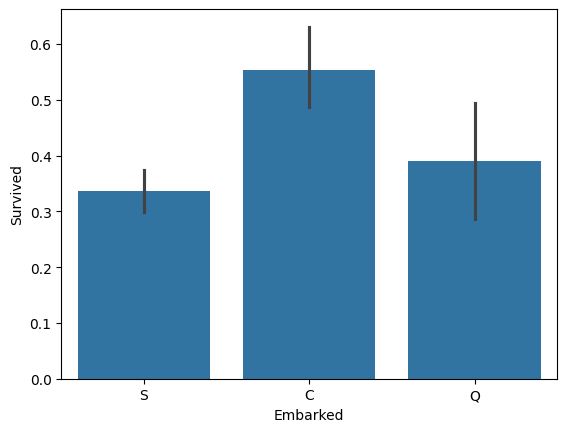

In [16]:
#Comparing the Embarked feature against Survived
sns.barplot(x='Embarked',y='Survived',data=train_df)
train_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


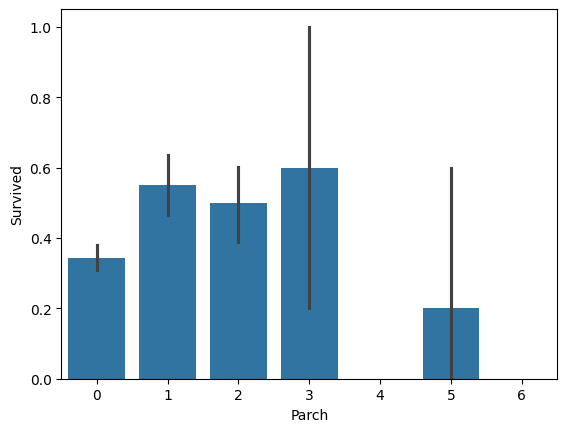

In [17]:
sns.barplot(x='Parch',y='Survived',data=train_df)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


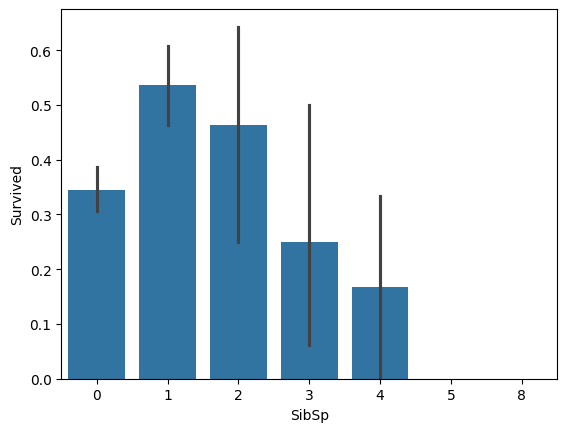

In [18]:
sns.barplot(x='SibSp',y='Survived',data=train_df)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

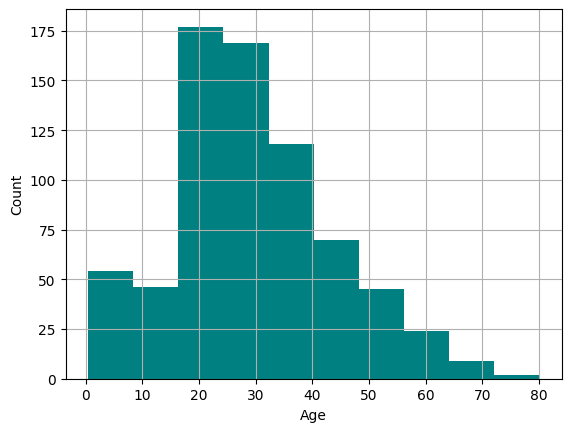

The Median age of passengers is : 28
The Standard Deviation age of passengers is : 14


In [19]:
train_df.Age.hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is :", int(train_df.Age.median()))
print("The Standard Deviation age of passengers is :", int(train_df.Age.std()))

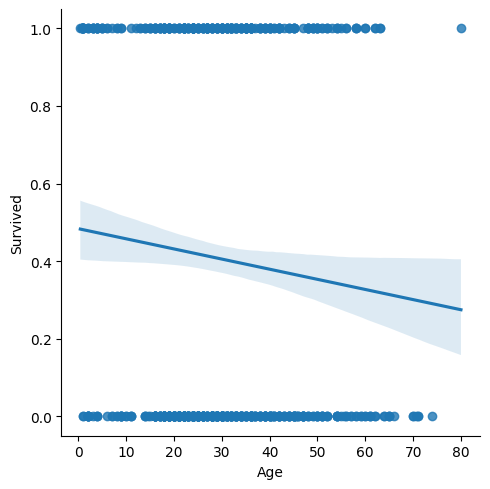

In [20]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')

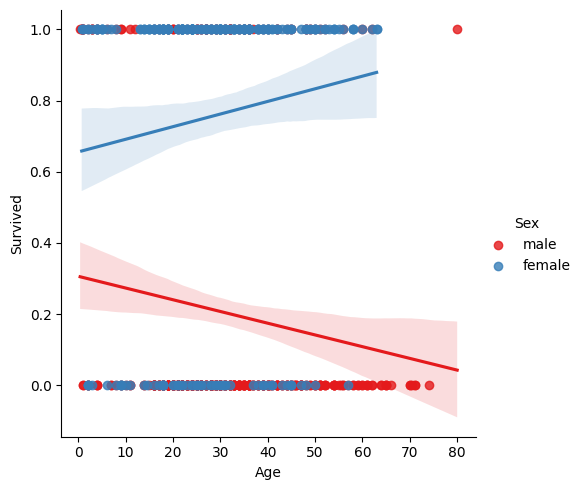

In [21]:
sns.lmplot(x='Age',y='Survived',data=train_df,hue='Sex',palette='Set1')

,Sex,Age
0,female,27.0
1,male,29.0


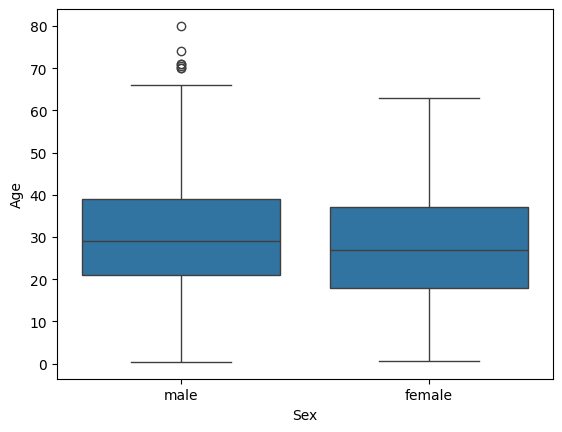

In [22]:
#Checking for outliers in Age data
sns.boxplot(x='Sex',y='Age',data=train_df)

#getting the median age according to Sex
train_df.groupby('Sex',as_index=False)['Age'].median()

Mean value of Fare is : 32.204207968574636
Median value of Fare is : 14.4542


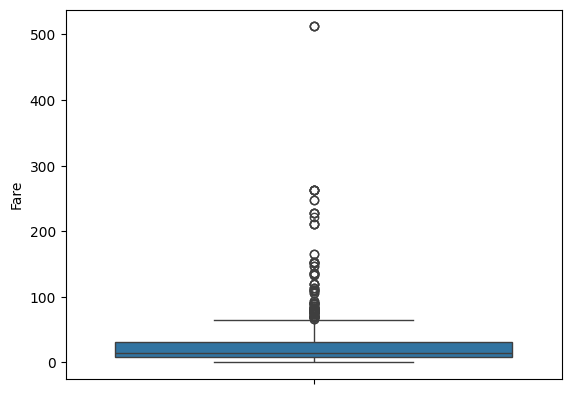

In [24]:
#plotting the Fare column to see the spread of data
sns.boxplot(y='Fare',data=train_df)

#Checking the mean and median values
print("Mean value of Fare is :",train_df.Fare.mean())
print("Median value of Fare is :",train_df.Fare.median())

In [25]:
#let's start off by dropping the coulmns we will not be needing
drop_list=['Cabin','Ticket','PassengerId']

train_df = train_df.drop(drop_list,axis=1)
test_passenger_df = pd.DataFrame(test_df.PassengerId)
test_df = test_df.drop(drop_list,axis=1)

test_passenger_df.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [26]:
#filling the missing Embarked values in train and test datasets
train_df.Embarked.fillna('S',inplace=True)

In [27]:
#filling the missing values in the Age column
train_df.Age.fillna(28, inplace=True)
test_df.Age.fillna(28, inplace=True)

In [28]:
#Filling the null Fare values in test dataset
test_df.Fare.fillna(test_df.Fare.median(), inplace=True)

**Feature Engineering**  

In [29]:
#combining train and test dataframes to work with them simultaneously
Combined_data = [train_df, test_df]

<Axes: xlabel='count', ylabel='Title'>

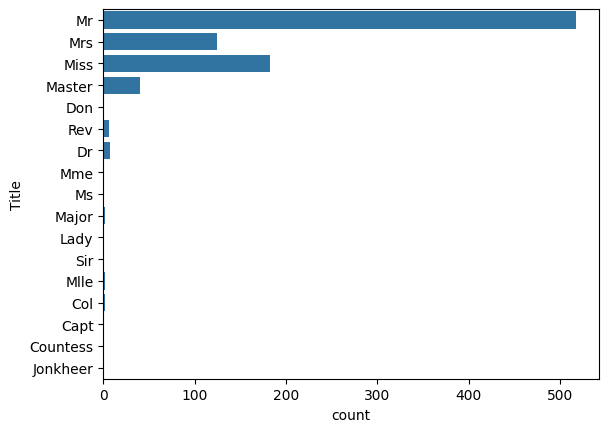

In [30]:
#extracting the various title in Names column
for dataset in Combined_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#Plotting the various titles extracted from the names
sns.countplot(y='Title',data=train_df)

In [31]:
#Refining the title feature by merging some titles
for dataset in Combined_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')

    dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})

train_df.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Special,0.347826
2,Mr,0.156673


<Axes: xlabel='count', ylabel='Title'>

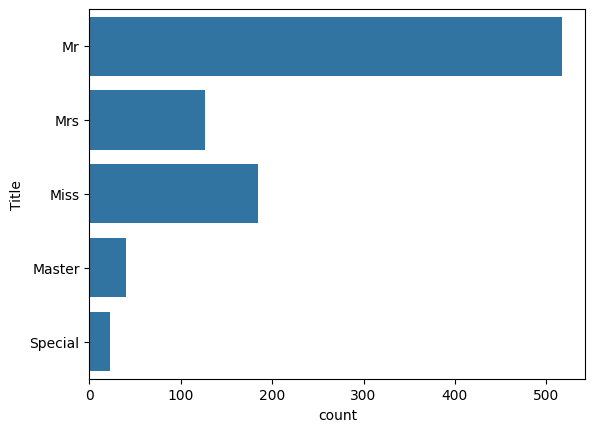

In [32]:
#Now lets see the distribution of the title feature
sns.countplot(y='Title',data=train_df)


In [33]:
#Mapping the title names to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}
for dataset in Combined_data:
    dataset['Title'] = dataset.Title.map(title_mapping)
    dataset['Title'] = dataset.Title.fillna(0)

In [34]:
#Creating a new feature IsAlone from the SibSp and Parch columns
for dataset in Combined_data:
    dataset["Family"] = dataset['SibSp'] + dataset['Parch']
    dataset["IsAlone"] = np.where(dataset["Family"] > 0, 0,1)
    dataset.drop('Family',axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1


In [35]:
#dropping the Name,SibSP and Parch columns
for dataset in Combined_data:
    dataset.drop(['SibSp','Parch','Name'],axis=1,inplace=True)

In [36]:
#Creating another feature if the passenger is a child
for dataset in Combined_data:
    dataset["IsMinor"] = np.where(dataset["Age"] < 15, 1, 0)

In [37]:
train_df['Old_Female'] = (train_df['Age']>50)&(train_df['Sex']=='female')
train_df['Old_Female'] = train_df['Old_Female'].astype(int)

test_df['Old_Female'] = (test_df['Age']>50)&(test_df['Sex']=='female')
test_df['Old_Female'] = test_df['Old_Female'].astype(int)

In [38]:
#Converting categorical variables into numerical ones
train_df2 = pd.get_dummies(train_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
test_df2 = pd.get_dummies(test_df,columns=['Pclass','Sex','Embarked'],drop_first=True)
train_df2.head()

,Survived,Age,Fare,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,0,0,False,True,True,False,True
1,1,38.0,71.2833,3,0,0,0,False,False,False,False,False
2,1,26.0,7.9250,2,1,0,0,False,True,False,False,True
3,1,35.0,53.1000,3,0,0,0,False,False,False,False,True
4,0,35.0,8.0500,1,1,0,0,False,True,True,False,True


In [39]:
#creating Age bands
train_df2['AgeBands'] = pd.qcut(train_df2.Age,4,labels=False)
test_df2['AgeBands'] = pd.qcut(test_df2.Age,4,labels=False)

In [40]:
#creating Fare bands
train_df2['FareBand'] = pd.qcut(train_df2.Fare,7,labels=False)
test_df2['FareBand'] = pd.qcut(test_df2.Fare,7,labels=False)

In [41]:
#Dropping the Age and Fare columns
train_df2.drop(['Age','Fare'],axis=1,inplace=True)
test_df2.drop(['Age','Fare'],axis=1,inplace=True)

In [42]:
train_df2.head()
#sns.barplot('AgeBands','Survived',data=train_df2)

,Survived,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,0,1,0,0,0,False,True,True,False,True,0,0
1,1,3,0,0,0,False,False,False,False,False,3,6
2,1,2,1,0,0,False,True,False,False,True,1,1
3,1,3,0,0,0,False,False,False,False,True,2,5
4,0,1,1,0,0,False,True,True,False,True,2,1


In [43]:
test_df2.head()

,Title,IsAlone,IsMinor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBands,FareBand
0,1,1,0,0,False,True,True,True,False,2,1
1,3,0,0,0,False,True,False,False,True,3,0
2,1,1,0,0,True,False,True,True,False,3,2
3,1,1,0,0,False,True,True,False,True,1,2
4,3,0,0,0,False,True,False,False,True,0,2


**Machine Learning**  

In [44]:
#importing the required ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [45]:
#Splitting out training data into X: features and y: target
X = train_df2.drop("Survived",axis=1)
y = train_df2["Survived"]

#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [46]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
acc_logreg

80.6

In [47]:
#let's perform some K-fold cross validation for logistic Regression
cv_scores = cross_val_score(logreg,X,y,cv=5)

np.mean(cv_scores)*100

np.float64(80.35904839620865)

In [48]:
#Decision Tree Classifier

decisiontree = DecisionTreeClassifier()
dep = np.arange(1,10)
param_grid = {'max_depth' : dep}

clf_cv = GridSearchCV(decisiontree, param_grid=param_grid, cv=5)

clf_cv.fit(X, y)
clf_cv.best_params_,clf_cv.best_score_*100
print('Best value of max_depth:',clf_cv.best_params_)
print('Best score:',clf_cv.best_score_*100)

Best value of max_depth: {'max_depth': np.int64(4)}
Best score: 82.37838177138912


In [49]:
#Random Forest CLassifier

random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(X, y)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)


Best value of n_estimators: {'n_estimators': np.int64(17)}
Best score: 79.2348251836043


In [50]:
gbk = GradientBoostingClassifier()
ne = np.arange(1,20)
dep = np.arange(1,10)
param_grid = {'n_estimators' : ne,'max_depth' : dep}

gbk_cv = GridSearchCV(gbk, param_grid=param_grid, cv=5)

gbk_cv.fit(X, y)
print('Best value of parameters:',gbk_cv.best_params_)
print('Best score:',gbk_cv.best_score_*100)

Best value of parameters: {'max_depth': np.int64(3), 'n_estimators': np.int64(16)}
Best score: 82.26476680685457


In [51]:
y_final = clf_cv.predict(test_df2)

submission = pd.DataFrame({
        "PassengerId": test_passenger_df["PassengerId"],
        "Survived": y_final
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


------


Create a dictionary to store the models and their parameter grids.



In [52]:
from sklearn.svm import SVC
import xgboost as xgb

models = {
    'Logistic Regression': (LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    'SVC': (SVC(), {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': np.arange(1, 10)}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': np.arange(1, 20), 'max_depth': np.arange(1, 10)}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'n_estimators': np.arange(1, 20), 'max_depth': np.arange(1, 10)}),
    'XGBoost': (xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {'n_estimators': np.arange(1, 20), 'max_depth': np.arange(1, 10)})
}


Iterate through the models dictionary, train each model using GridSearchCV, and store the best model and its best score in the respective dictionaries.



In [53]:
best_models = {}
best_scores = {}

for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
    grid_search.fit(X, y)
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_ * 100
    print(f"{model_name} Best Score: {best_scores[model_name]:.2f}")

Training Logistic Regression...
Logistic Regression Best Score: 80.70
Training SVC...
SVC Best Score: 82.83
Training Decision Tree...
Decision Tree Best Score: 82.38
Training Random Forest...
Random Forest Best Score: 82.83
Training Gradient Boosting...
Gradient Boosting Best Score: 82.26
Training XGBoost...
XGBoost Best Score: 82.83



Iterate through the best_scores and best_models dictionaries to display the best scores and parameters for each trained model.



In [54]:
for model_name, score in best_scores.items():
    print(f"{model_name}: Best Cross-Validation Score = {score:.2f}%")
    print(f"{model_name}: Best Parameters = {best_models[model_name].get_params()}\n")

Logistic Regression: Best Cross-Validation Score = 80.70%
Logistic Regression: Best Parameters = {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

SVC: Best Cross-Validation Score = 82.83%
SVC: Best Parameters = {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Decision Tree: Best Cross-Validation Score = 82.38%
Decision Tree: Best Parameters = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': np.int64(4), 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_sam


Find the model with the highest best cross-validation score and store the best model and its name.



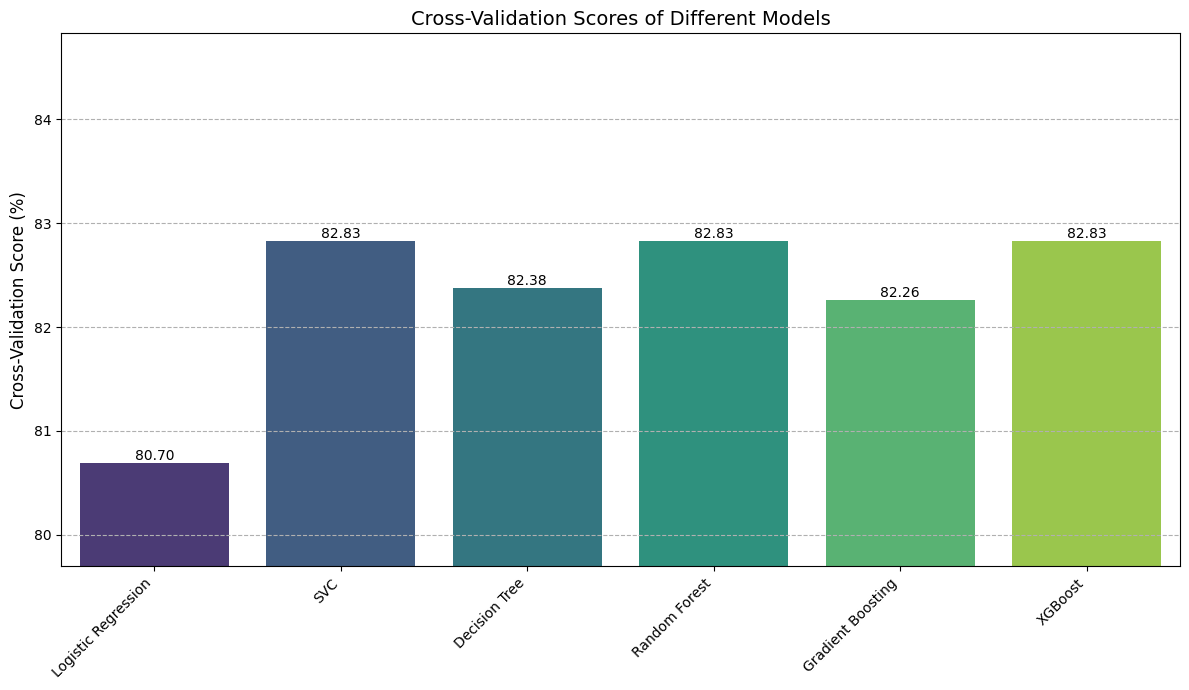

In [62]:
# Visualize the best cross-validation scores
model_names = list(best_scores.keys())
scores = list(best_scores.values())

plt.figure(figsize=(12, 7))
ax = sns.barplot(x=model_names, y=scores, palette='viridis')
plt.ylabel('Cross-Validation Score (%)', fontsize=12)
plt.title('Cross-Validation Scores of Different Models', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(min(scores) - 1, max(scores) + 2)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Add scores on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.show()

In [63]:
best_model_name = max(best_scores, key=best_scores.get)#the last one got selected
final_model = best_models[best_model_name]

print(f"The best performing model is: {best_model_name}")
print(f"Best cross-validation score: {best_scores[best_model_name]:.2f}%")

The best performing model is: XGBoost
Best cross-validation score: 82.83%



Use the best performing model (`final_model`) to make predictions on the test dataset (`test_df2`).



In [56]:
y_pred_test = final_model.predict(test_df2)

In [57]:
submission = pd.DataFrame({
    "PassengerId": test_passenger_df["PassengerId"],
    "Survived": y_pred_test
})
display(submission.head())

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## Summary:

### Data Analysis Key Findings

*   Six different machine learning models were trained and evaluated: Logistic Regression, SVC, Decision Tree, Random Forest, Gradient Boosting, and XGBoost.
*   GridSearchCV with 5-fold cross-validation was used to find the best hyperparameters for each model.
*   The best cross-validation scores obtained were: Logistic Regression: 80.70%, SVC: 82.83%, Decision Tree: 82.38%, Random Forest: 82.83%, Gradient Boosting: 82.26%, and XGBoost: 82.83%.
*   Multiple models (SVC, Random Forest, and XGBoost) achieved the highest best cross-validation score of 82.83%.
*   XGBoost was selected as the best performing model.
*   Predictions were made on the test dataset using the selected XGBoost model.
*   A submission file was generated with 'PassengerId' and 'Survived' columns.

### Insights or Next Steps

*   Since multiple models achieved the same highest score, further analysis or ensemble methods could be explored to potentially improve performance.
*   Consider analyzing the feature importances of the selected model (XGBoost) to gain insights into which features are most influential in predicting survival.
